In [2]:
%load_ext autoreload
%autoreload 2

from ml4a import image
from ml4a.models import semantic_segmentation

print(semantic_segmentation.classes)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{0: 'wall', 1: 'building', 2: 'sky', 3: 'floor', 4: 'tree', 5: 'ceiling', 6: 'road', 7: 'bed', 8: 'windowpane', 9: 'grass', 10: 'cabinet', 11: 'sidewalk', 12: 'person', 13: 'earth', 14: 'door', 15: 'table', 16: 'mountain', 17: 'plant', 18: 'curtain', 19: 'chair', 20: 'car', 21: 'water', 22: 'painting', 23: 'sofa', 24: 'shelf', 25: 'house', 26: 'sea', 27: 'mirror', 28: 'rug', 29: 'field', 30: 'armchair', 31: 'seat', 32: 'fence', 33: 'desk', 34: 'rock', 35: 'wardrobe', 36: 'lamp', 37: 'bathtub', 38: 'railing', 39: 'cushion', 40: 'base', 41: 'box', 42: 'column', 43: 'signboard', 44: 'chest', 45: 'counter', 46: 'sand', 47: 'sink', 48: 'skyscraper', 49: 'fireplace', 50: 'refrigerator', 51: 'grandstand', 52: 'path', 53: 'stairs', 54: 'runway', 55: 'case', 56: 'pool', 57: 'pillow', 58: 'screen', 59: 'stairway', 60: 'river', 61: 'bridge', 62: 'bookcase', 63: 'blind', 64: 'coffee', 65: 'toilet', 66: 'flower'

Load an image, run semantic segmentation on it.

Loading weights for net_encoder
Loading weights for net_decoder


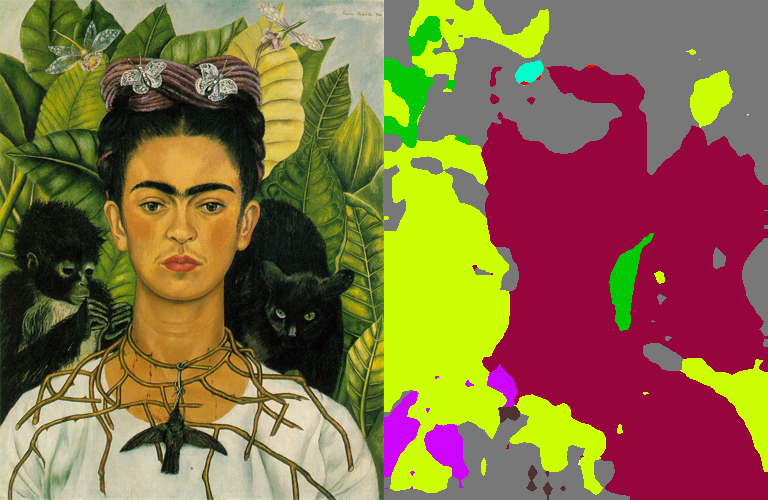

In [3]:
img = image.load_image('../../../neural_style/images/inputs/frida_kahlo.jpg', (384, 500))
labels = semantic_segmentation.run(img)
semantic_segmentation.visualize(img, labels)

Draw segments for top 3 classes found.

1: person


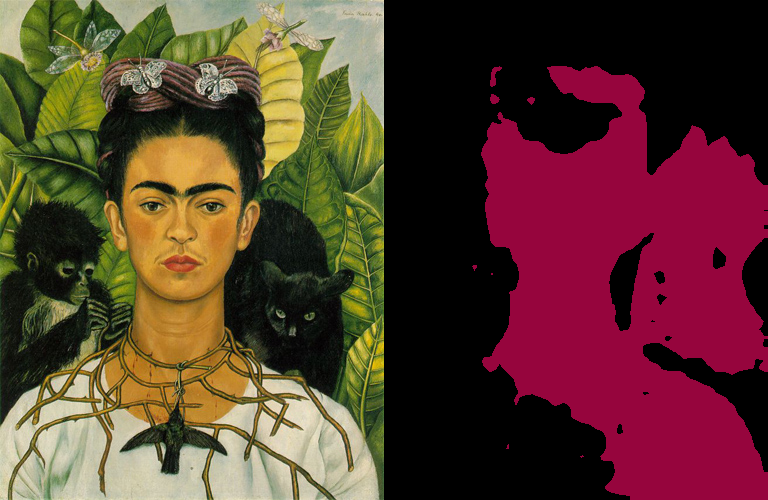

2: wall


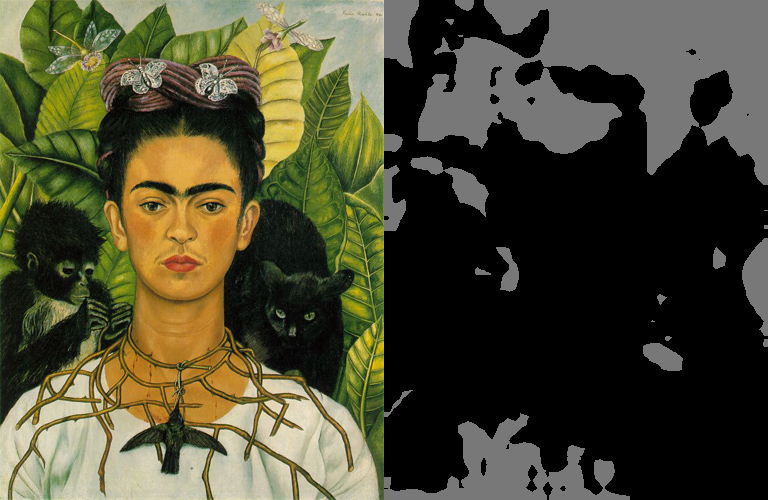

3: plant


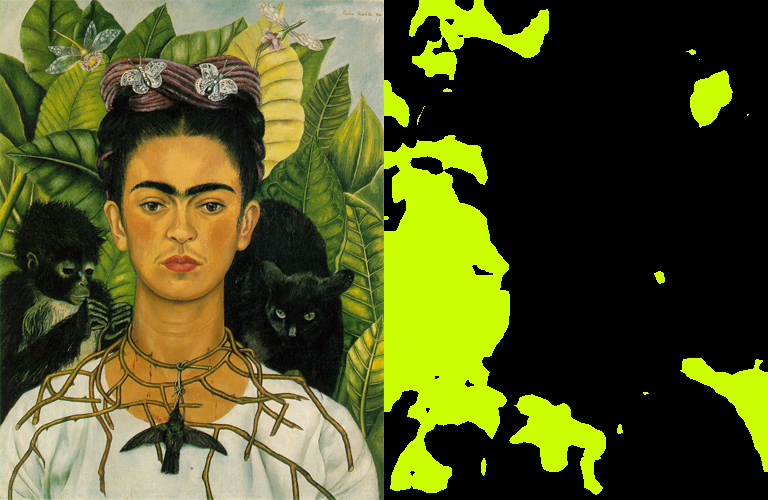

In [4]:
import numpy as np

top_classes = np.bincount(labels.flatten()).argsort()[::-1]
for c, top_class in enumerate(top_classes[:3]):
    class_name = semantic_segmentation.classes[top_class]
    print('%d: %s' % (c+1, class_name))
    semantic_segmentation.visualize(img, labels, top_class)

Mask image with one of its segments.

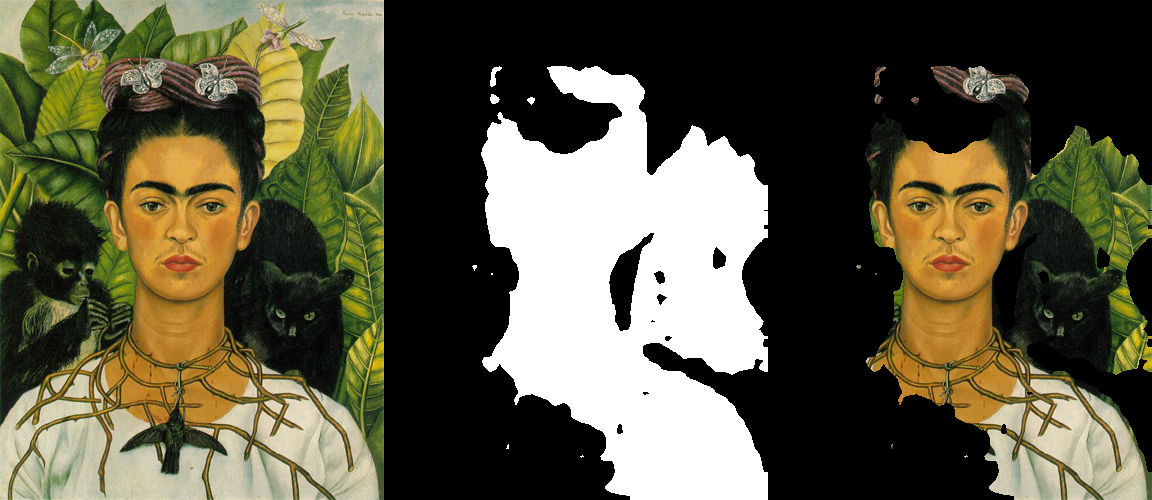

In [5]:
from ml4a.canvas import mask

person_mask = semantic_segmentation.get_mask(labels, index='person')
img_masked = mask.mask_image(person_mask, img)

all_images = image.concatenate_images([img, person_mask, img_masked])
image.display(all_images)

Passing a list of classes will give you a mask with a channel for each.

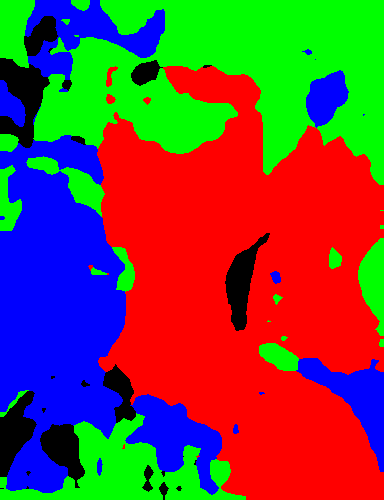

In [6]:
multi_mask = semantic_segmentation.get_mask(labels, index=['person', 'wall', 'plant'])
image.display(multi_mask)